In [14]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import scipy
from scipy import stats
from scipy.stats import norm
import statistics
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
import pylab as py

import plotly.express as px

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv("/content/Cleaned_GapMinder.csv")
df.head()

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,oilperperson,country,countrycode
0,8740.966,0.030,0.570,26.800,75944000.000,25.600,1.935,3.654,49.624,0.000,1173.179,6.684,55.700,24.040,1.484,Afghanistan,AFG
1,1914.997,7.290,1.025,57.400,223747333.333,42.100,1.935,44.990,76.918,9.000,636.341,7.699,51.400,46.720,1.484,Albania,ALB
2,2231.993,0.690,2.307,23.500,2932108666.667,31.700,0.100,12.500,73.131,2.000,590.510,4.849,50.500,65.220,0.420,Algeria,DZA
3,20423.174,10.170,1.444,37.403,5033261621.667,47.549,1.935,81.000,69.754,3.689,1173.179,5.362,58.636,88.920,1.484,Andorra,AND
4,1381.004,5.570,1.461,23.100,248358000.000,69.400,2.000,10.000,51.093,-2.000,172.999,14.555,75.700,56.700,1.484,Angola,AGO


## Statistical Exploration

In [8]:
df['polityscore_binned'] = pd.cut(df.polityscore, 3, labels=['Low', 'Med', 'High'])

In [10]:
model1 = smf.ols(formula='internetuserate ~ C(polityscore_binned)', data=df)
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        internetuserate   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     18.68
Date:                Mon, 31 Jul 2023   Prob (F-statistic):           3.40e-08
Time:                        22:42:04   Log-Likelihood:                -981.26
No. Observations:                 213   AIC:                             1969.
Df Residuals:                     210   BIC:                             1979.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        27.0408      4.013      6.738      0.000      19.130      34.952
C(polityscore_binned)[T.Med]    -16.3729      6.482     -2.526      0.012     -29.151      -3.595
C(polityscore_binned)[T.High]    14.4226      4.472      3.225      0.001       5.607      23.239
==============================================================================
Omnibus:                        9.797   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                7.967
Skew:                           0.381   Prob(JB):                       0.0186
Kurtosis:                       2.438   Cond. No.                         5.91
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
m1= df.groupby('polityscore_binned').mean()
m1

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,oilperperson
polityscore_binned,,,,,,,,,,,,,,,
Low,4387.689,4.089,1.561,23.711,1437151536.036,43.743,1.353,27.041,67.801,-6.081,849.514,7.577,59.319,55.455,1.660
Med,2357.267,3.791,1.202,23.826,395401695.652,54.048,2.045,10.668,59.645,0.043,726.188,10.533,64.710,42.425,1.905
High,7787.624,7.726,1.127,41.489,1803591928.638,47.384,1.266,41.463,71.809,6.607,1055.799,9.593,57.496,59.243,1.378


In [12]:
sd1 = df.groupby('polityscore_binned').std()
sd1

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,oilperperson
polityscore_binned,,,,,,,,,,,,,,,
Low,5223.497,4.140,0.927,9.186,1944966608.932,16.533,1.385,20.639,8.325,2.110,740.136,5.849,10.854,22.782,1.241
Med,4632.196,3.936,0.949,7.466,793817370.439,18.238,1.647,15.440,8.465,1.609,527.520,4.862,13.017,23.726,2.261
High,7220.683,4.274,0.646,18.670,2358747231.603,9.639,1.146,26.227,8.230,2.560,632.380,4.832,7.786,22.661,0.456


## Generating a Correlation Coefficient

### Association between incomeperperson and internetuserate

In [15]:
scipy.stats.pearsonr(df['incomeperperson'], df['internetuserate'])

PearsonRResult(statistic=0.8098742759330543, pvalue=8.923255617035536e-51)

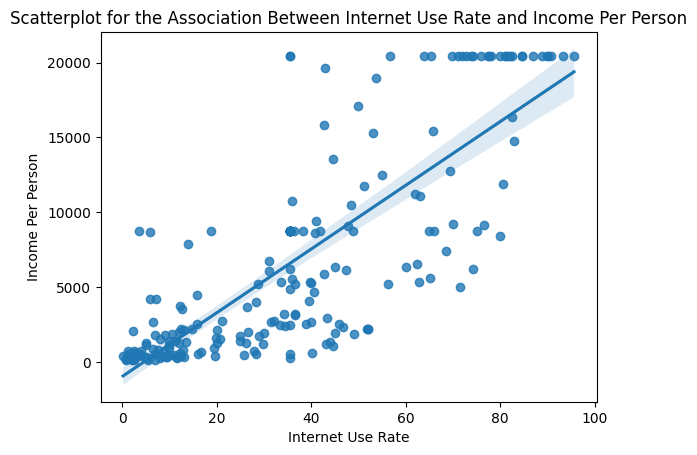

In [17]:
plt.figure()
scat1 = sns.regplot(x="internetuserate", y="incomeperperson", fit_reg=True, data=df)
plt.xlabel('Internet Use Rate')
plt.ylabel('Income Per Person')
plt.title('Scatterplot for the Association Between Internet Use Rate and Income Per Person')
plt.show()

## Testing a Potential Moderator

In [18]:
# Perform ANOVA, Chi-Square Test or correlation coefficient that includes a moderator
scipy.stats.pearsonr(df['employrate'], df['internetuserate'])

PearsonRResult(statistic=-0.16938476822223694, pvalue=0.013306603290255134)

Sort countries into three income groups: Low, Mid, and High; and print the counts in each group.

In [19]:
def incomegrp(row):
    if row['incomeperperson'] <= 744.239:
        return 1
    elif row['incomeperperson'] <= 9425.326:
        return 2
    elif row['incomeperperson'] > 9425.326:
        return 3

pd.options.mode.chained_assignment = None
df['incomegrp'] = df.apply(lambda row: incomegrp(row), axis=1)

chk1 = df['incomegrp'].value_counts(sort=False)
chk1

2    119
3     47
1     47
Name: incomegrp, dtype: int64

In [21]:
clean_df1 = df[(df['incomegrp']== 1)]
clean_df2 = df[(df['incomegrp']== 2)]
clean_df3 = df[(df['incomegrp']== 3)]

Association between employrate and internetuserate for LOW income countries

In [23]:
scipy.stats.pearsonr(clean_df1['employrate'], clean_df1['internetuserate'])

PearsonRResult(statistic=-0.3169393731190387, pvalue=0.029959920361115253)

Association between employrate and internetuserate for MIDDLE income countries'

In [24]:
scipy.stats.pearsonr(clean_df2['employrate'], clean_df2['internetuserate'])

PearsonRResult(statistic=-0.13581623688283975, pvalue=0.14081169915932928)

Association between employrate and internetuserate for HIGH income countries'

In [25]:
scipy.stats.pearsonr(clean_df3['employrate'], clean_df3['internetuserate'])

PearsonRResult(statistic=0.30957604133602235, pvalue=0.034215519211958915)

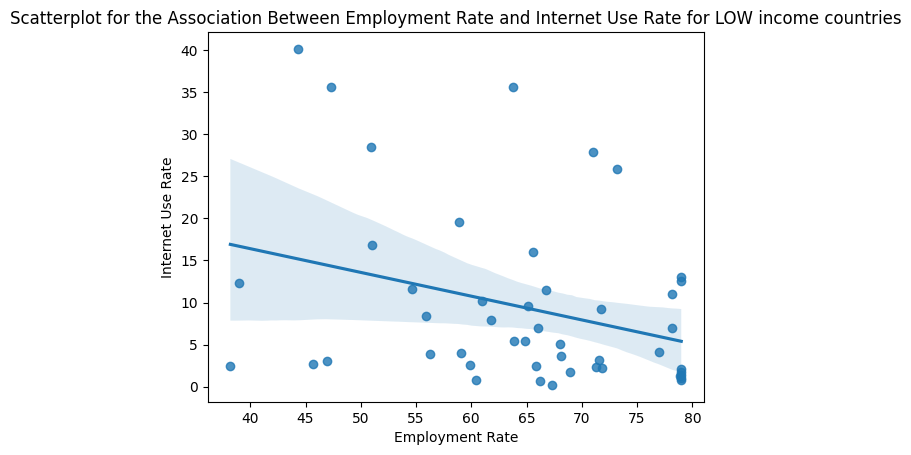

In [27]:
scat1 = sns.regplot(x="employrate", y="internetuserate", data=clean_df1)
plt.xlabel('Employment Rate')
plt.ylabel('Internet Use Rate')
plt.title('Scatterplot for the Association Between Employment Rate and Internet Use Rate for LOW income countries')
plt.show()

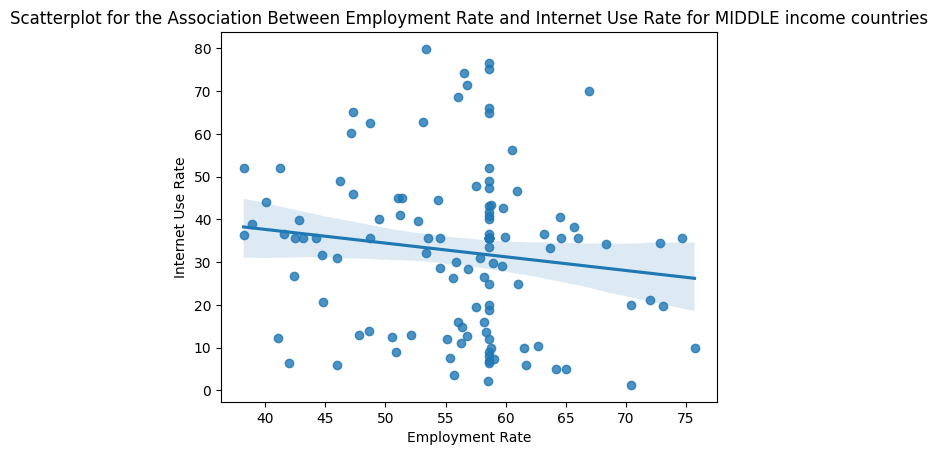

In [28]:
scat2 = sns.regplot(x="employrate", y="internetuserate", data=clean_df2)
plt.xlabel('Employment Rate')
plt.ylabel('Internet Use Rate')
plt.title('Scatterplot for the Association Between Employment Rate and Internet Use Rate for MIDDLE income countries')
plt.show()

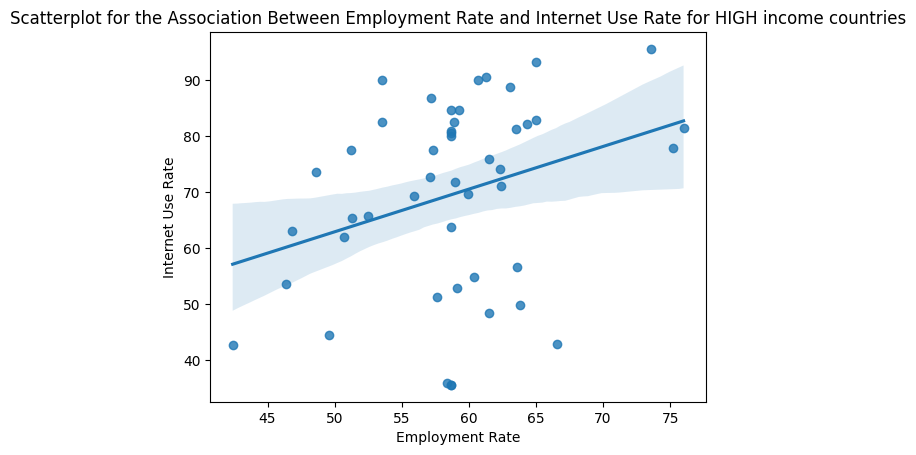

In [29]:
scat3 = sns.regplot(x="employrate", y="internetuserate", data=clean_df3)
plt.xlabel('Employment Rate')
plt.ylabel('Internet Use Rate')
plt.title('Scatterplot for the Association Between Employment Rate and Internet Use Rate for HIGH income countries')
plt.show()

## Thank you so much. Sincerely, Eslam Fouad.